In [1]:
# Importing libraries to read & visualize the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#reading a dataset
df = pd.read_csv("/content/drive/MyDrive/Census_Data.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
#Data Cleaning 
df.drop('education', inplace=True, axis=1)
df.columns.tolist()

['age',
 'workclass',
 'fnlwgt',
 'education.num',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'native.country',
 'income']

In [6]:
# check for nulls
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [7]:
# check duplicates and remove it
print("Before removing duplicates:", df.duplicated().sum())

df = df[~df.duplicated()]

print("After removing duplicates:", df.duplicated().sum())

Before removing duplicates: 24
After removing duplicates: 0


In [8]:
# before discarding
df.sex.value_counts()

Male      21775
Female    10762
Name: sex, dtype: int64

In [9]:
# discard spaces from entries
columns = ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']
for column in columns:
    df[column] = df[column].str.strip()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [10]:
# After discarding
df.sex.value_counts()

Male      21775
Female    10762
Name: sex, dtype: int64

In [11]:
#Data Exploration
#quick look on some statistics about the data
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


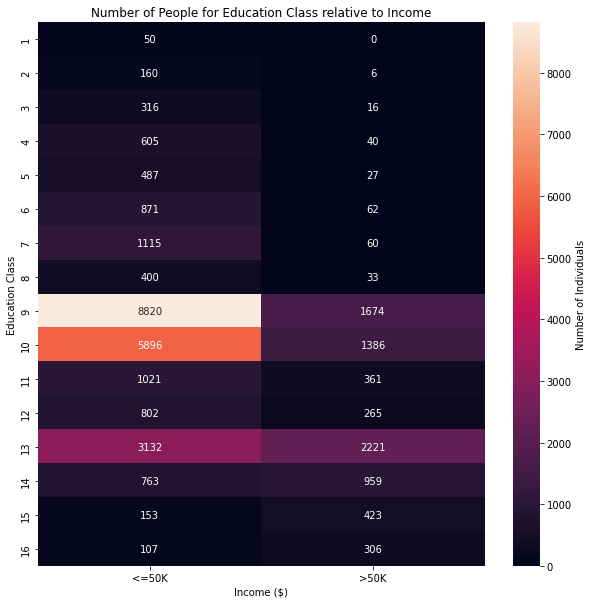

In [12]:
# use of Heat map
plt.figure(figsize=[10,10])
 
ct_counts = df.groupby(['education.num', 'income']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'education.num', columns = 'income', values = 'count').fillna(0)

sb.heatmap(ct_counts, annot = True, fmt = '.0f', cbar_kws = {'label' : 'Number of Individuals'})
plt.title('Number of People for Education Class relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Education Class');

map shows people with education classes of 9 & 10 make up the highest portion in the dataset. Also, we notice that people with education class of 14 to 16 proportionally usually make >50k as income in the statistics we have in the dataset, unlike lesser education classes where they usually make <=50k as income.

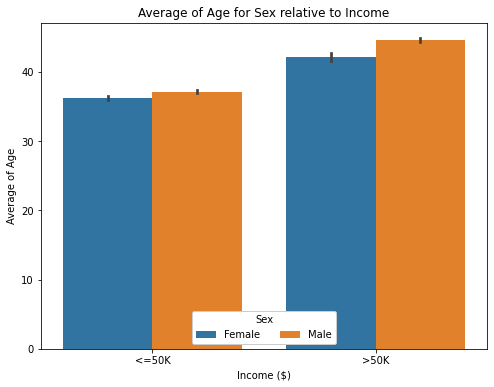

In [13]:
# Clustered Bar Chart 
plt.figure(figsize=[8,6])
ax = sb.barplot(data = df, x = 'income', y = 'age', hue = 'sex')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Sex')
plt.title('Average of Age for Sex relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Average of Age');

people with >50K has a higher average age than the ones with <=50K. And in both cases of income, we see that the male has a little bit greater age average than female category.

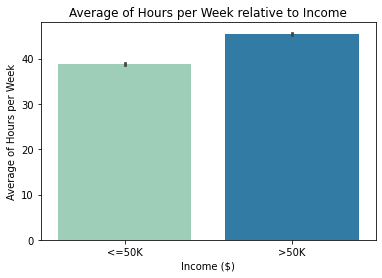

In [15]:
# Bar plot 
plt.figure(figsize=[6,4])
sb.barplot(data=df, x='income', y='hours.per.week', palette='YlGnBu')
plt.title('Average of Hours per Week relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Average of Hours per Week');

income grows directly with average of work hours per week, which is reasonable and logical result.

In [16]:
#data preprocessing
cens_prep = df.copy()

taken copy of dataset to maintain the cleaned one for later uses, and use copied one for preparing data for the model.

In [17]:
# Scalling
from sklearn.preprocessing import MinMaxScaler
numerical = ['age', 'capital.gain', 'capital.loss', 'hours.per.week', 'fnlwgt']

scaler = MinMaxScaler()
cens_prep[numerical] = scaler.fit_transform(cens_prep[numerical])

In [18]:
cens_prep.sample(2)

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
11469,0.547945,Private,0.102391,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,0.377551,United-States,<=50K
14027,0.383562,Private,0.070612,9,Never-married,Exec-managerial,Not-in-family,Black,Female,0.0,0.0,0.397959,United-States,<=50K


MinMaxScalling- which converts data to have a range between 0 and 1. That would help to make the data well-prepared for the model.

In [19]:
# Encoding
cens_prep['sex'] = cens_prep.sex.replace({"Female": 0, "Male": 1})
cens_prep['income'] = cens_prep.income.replace({"<=50K": 0, ">50K": 1})

# Create dummy variables
cens_prep = pd.get_dummies(cens_prep)

In [20]:
encoded = list(cens_prep.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

92 total features after one-hot encoding.


In [21]:
# import some classification models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

# import needed functions
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [22]:
X = cens_prep.drop('income', axis=1)
y = cens_prep['income']

# Splitting to training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
models = {}

# models with default parameter
models['LogisticRegression'] = LogisticRegression()
models['RandomForest'] = RandomForestClassifier()
models['AdaBoost'] = AdaBoostClassifier()

In [24]:
# Cross validation
for model_name in models:
    model = models[model_name]
    results = cross_validate(model, X, y, cv=5, scoring=['accuracy', 'f1'], return_train_score=True)
    
    print(model_name + ":")
    print("Accuracy:" , 'train: ', results['train_accuracy'].mean(), '| test: ', results['test_accuracy'].mean())
    print("F1-score:" , 'train: ', results['train_f1'].mean(), '| test: ', results['test_f1'].mean())
    print("---------------------------------------------------------")

LogisticRegression:
Accuracy: train:  0.8519453721990722 | test:  0.840519004213608
F1-score: train:  0.661685355350541 | test:  0.6158729885726363
---------------------------------------------------------
RandomForest:
Accuracy: train:  0.9999231649878035 | test:  0.8072671726321113
F1-score: train:  0.9998405078209004 | test:  0.5445575638518074
---------------------------------------------------------
AdaBoost:
Accuracy: train:  0.8639317120312937 | test:  0.8057618437295414
F1-score: train:  0.6878887905307878 | test:  0.5292911722353504
---------------------------------------------------------


In [27]:
#oversampling to maintain balance of clases of classification 
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=32)
X_resampled, y_resampled = ros.fit_resample(X, y)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=32)

In [28]:
clf = RandomForestClassifier()

results = cross_validate(clf, X_resampled, y_resampled, cv=5, scoring=['accuracy', 'f1'], return_train_score=True)
print("Accuracy:" , 'train: ', results['train_accuracy'].mean(), '| test: ', results['test_accuracy'].mean())
print("F1-score:" , 'train: ', results['train_f1'].mean(), '| test: ', results['test_f1'].mean())

Accuracy: train:  0.9999746943072289 | test:  0.912322951846902
F1-score: train:  0.9999746941791253 | test:  0.9201879323678028
